**Group-08**<br/>
<font style="color:red"> **Belhassen Ghoul <br/> Robin Ehrensperger <br/> Dominic Diedenhofen**</font>

In [50]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchsummary import summary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


### Load Data

For the example's sake we here don't split further in a validation set. Just compute the confusion matrix based on prediction for the test data.

In [51]:
training_data = datasets.mnist.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.mnist.MNIST(root="data", train=False, download=True, transform=ToTensor())

trainloader = DataLoader(training_data, shuffle=True,batch_size=64)
testloader = DataLoader(test_data, shuffle=True,batch_size=64)

### Model

Specify your favorite MLP as determined in one of the previous execises.

In [52]:
class MLP(torch.nn.Module):    
    def __init__(self, params):
        super(MLP, self).__init__()
        self.units = params[1]
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(params[0],params[1])
        self.ReLU = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(params[1],params[2])
        self.ReLU2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(params[2],params[3])

    def forward(self, x):
        z = self.linear1(self.flatten(x))
        z = self.ReLU(z)
        z = self.linear2(z)
        z = self.ReLU2(z)
        return self.linear3(z)

In [53]:
model = MLP([28*28,200,80,10])

In [54]:
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 200]         157,000
              ReLU-3                  [-1, 200]               0
            Linear-4                   [-1, 80]          16,080
              ReLU-5                   [-1, 80]               0
            Linear-6                   [-1, 10]             810
Total params: 173,890
Trainable params: 173,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.66
Estimated Total Size (MB): 0.68
----------------------------------------------------------------


### Train-Validate

Specify the training / evaluation loop. Specifically, make sure that the confusion matrix is computed at the end of every epoch and remember it. 

In [58]:
def train_eval(nepochs, model, lr, trainloader, testloader, cost_fn):
    cost_hist = []
    cost_hist_test = []
    acc_hist = []
    acc_hist_test = []
    cm_hist_test = []

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(nepochs):
        model.train()
        cost, acc = 0.0, 0.0
        for (X, Y) in trainloader:
            pred = model(X)
            loss = cost_fn(pred, Y)
            cost += loss.item()/len(trainloader)
            acc += (pred.argmax(dim=1) == Y).type(torch.float).sum().item()/len(trainloader.dataset)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        
        
        model.eval()
        cost_test,acc_test = 0.0,0.0
        with torch.no_grad():
            for (X,Y) in testloader:
                pred = model(X)
                cost_test += cost_fn(pred, Y).item()/len(testloader)
                acc_test += (pred.argmax(dim=1) == Y).type(torch.float).mean().item()/len(testloader)

                
        
        print("Epoch %i: %f, %f, %f, %f"%(epoch, cost, acc, cost_test, acc_test))
        cost_hist.append(cost)
        cost_hist_test.append(cost_test)
        acc_hist.append(acc)
        acc_hist_test.append(acc_test)
    

        cm = confusion_matrix(Y,pred.argmax(dim=1) )
        cm_hist_test.append(cm)

        from sklearn.metrics import accuracy_score, recall_score, precision_score

        print("Accuracy: ", accuracy_score(pred.argmax(dim=1), Y))
        print("Precision: ", precision_score(pred.argmax(dim=1), Y,average="weighted"))
        print("Recall: ", recall_score(pred.argmax(dim=1), Y,average="weighted"))
                
    return cost_hist, cost_hist_test, acc_hist, acc_hist_test, cm_hist_test

### Select your favourite settings and Do the Training incl Validation Performance

In [59]:
# Configuration options
nepochs = 20
lr = 0.3
batchsize = 64
cost_fn = torch.nn.CrossEntropyLoss()

In [60]:
results = train_eval(nepochs, model, lr, trainloader, testloader, cost_fn) 

Epoch 0: 0.107141, 0.966250, 0.098983, 0.968551
Accuracy:  0.9375
Precision:  0.953125
Recall:  0.9375
Epoch 1: 0.076607, 0.976467, 0.079493, 0.976115
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 2: 0.057247, 0.982233, 0.086626, 0.973129
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 3: 0.042747, 0.986267, 0.080108, 0.976015
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 4: 0.035426, 0.988617, 0.108109, 0.968153
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 5: 0.026976, 0.990667, 0.077067, 0.979299
Accuracy:  0.9375
Precision:  1.0
Recall:  0.9375


c:\Users\Belg\Python\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6: 0.021482, 0.993433, 0.134113, 0.963475
Accuracy:  0.9375
Precision:  0.96875
Recall:  0.9375
Epoch 7: 0.016490, 0.994817, 0.093891, 0.975816
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 8: 0.013295, 0.995650, 0.088093, 0.977707
Accuracy:  0.8125
Precision:  0.8541666666666665
Recall:  0.8125
Epoch 9: 0.010732, 0.996767, 0.079410, 0.980195
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 10: 0.006610, 0.998200, 0.079042, 0.981389
Accuracy:  0.9375
Precision:  0.953125
Recall:  0.9375
Epoch 11: 0.004640, 0.998750, 0.076683, 0.981588
Accuracy:  0.875
Precision:  0.9270833333333333
Recall:  0.875
Epoch 12: 0.002366, 0.999550, 0.082736, 0.981091
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 13: 0.001722, 0.999667, 0.073604, 0.984076
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 14: 0.000680, 0.999950, 0.075867, 0.983479
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 15: 0.000482, 0.999983, 0.076669, 0.983977
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Epoch 16: 0.0

### Inspect Confusion Matrix

In the given implementation below, we use seaborn for depicting the confusion matrix as a heat map. Hence, make sure to have that installed in your environment.

Note that the heatmap includes two different color scheme - one for the diagonal, one for the off-diagonal elements. 

In [61]:
import seaborn as sn

def display_cm(cf_matrix):
    plt.figure(figsize = (12,7))
    off_diag_mask = np.eye(*cf_matrix.shape, dtype=bool)
    cm = cf_matrix / np.sum(cf_matrix) * 10
    vmin = np.min(cm[~off_diag_mask])
    vmax = np.max(cm[~off_diag_mask])
    sn.heatmap(cm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))
    vmin = np.min(cm[off_diag_mask])
    vmax = np.max(cm[off_diag_mask])
    sn.heatmap(cm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax)
    #df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in range(10)], columns = [i for i in range(10)])
    #sn.heatmap(df_cm, annot=True, cmap='Blues')


<Figure size 432x288 with 0 Axes>

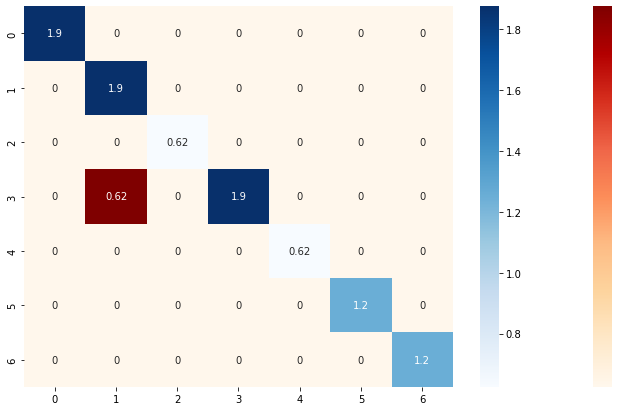

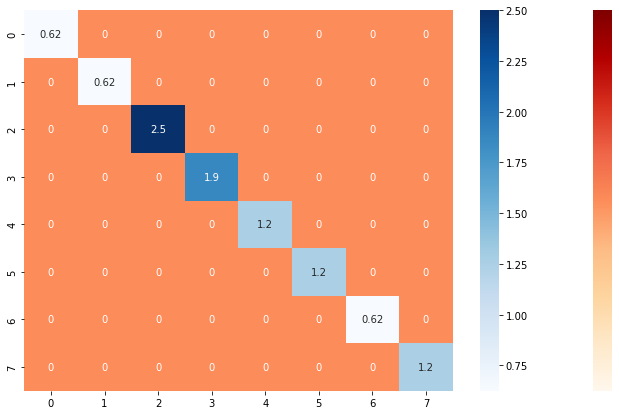

In [62]:
plt.figure(1)
display_cm(results[4][0])

plt.figure(2)
display_cm(results[4][19])

### Interpret!

Analyse how the CM evolves. Indicate what remains a problem for the model to properly classify.


<font style="color:red"> What I can see here from the **confusion matrix** it predicts very well the model works perfect for the Training as well for the test, but in the thest it make one big mistake where it thinks its a 3 but its actual 5 but in general I'm pretty happy with the model </font>

### Compute Accuracy, Precision, Recall
<font style="color:red"> The computed Accuracy, precision and recall you will find pinted for each epoche above. </font>